In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
#!pip install dtreeviz
import pandas as pd
import numpy as np
import joblib
np.random.seed(123)

In [55]:
with open('/content/drive/Othercomputers/내 노트북/study/08_DS/data/multi_classification/my_val.pkl','rb') as f:
    data = joblib.load(f)
    print(data.keys())
locals().update(data)
del data
idx2job = pd.read_csv('/content/drive/Othercomputers/내 노트북/study/08_DS/data/multi_classification/idx2job.csv', index_col=0)
idx2job = idx2job['job'].to_dict()
y = y.replace(idx2job)
val_y = val_y.replace(idx2job)

dict_keys(['x', 'y', 'val_x', 'val_y'])


In [56]:
def my_sam(x, y, t):
    target = x.loc[y[y==t].index]
    non_target = x.loc[y[y!=t].index].sample(len(target))
    my_sample = pd.concat([target, non_target])
    my_sample = my_sample.sample(len(my_sample))
    my_y = pd.concat([pd.Series(1, index=y.loc[target.index].index),
                      pd.Series(0, index=y.loc[non_target.index].index)])
    my_y = my_y.loc[my_sample.index]
    return my_sample, my_y

In [57]:
my_x, my_y = my_sam(x,y, 15)

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3) # 3~5개로하면 해석하기 좋음
dt.fit(my_x, my_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [59]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
import dtreeviz
# https://github.com/parrt/dtreeviz
viz = dtreeviz.model(dt, my_x, my_y, target_name='Computer', feature_names=my_x.columns, class_names=[0,1])

In [ ]:
import warnings
warnings.filterwarnings(action='ignore') 

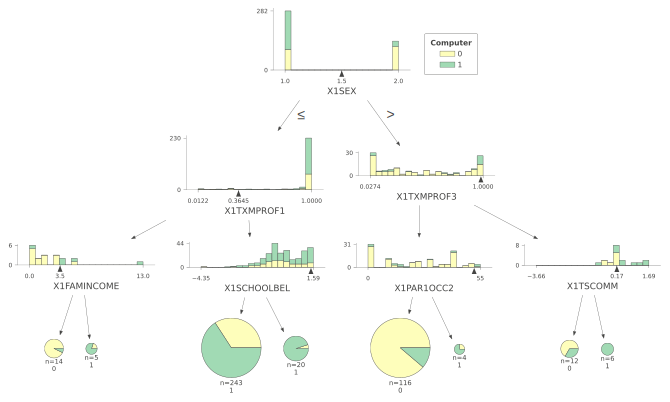

In [ ]:
v = viz.view(scale=1)
v

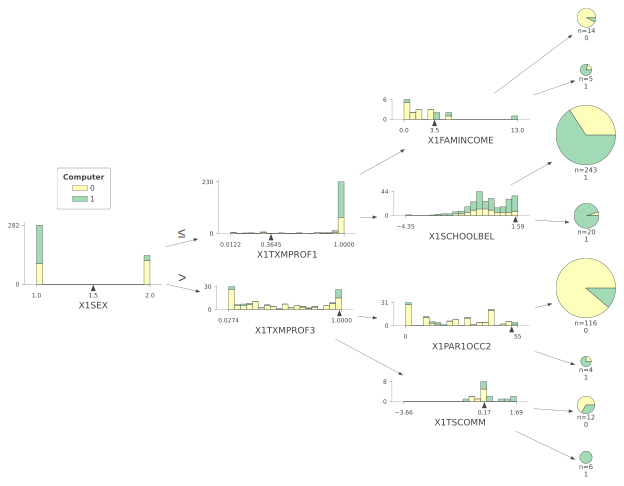

In [ ]:
v = viz.view(scale=1, orientation='LR')
v

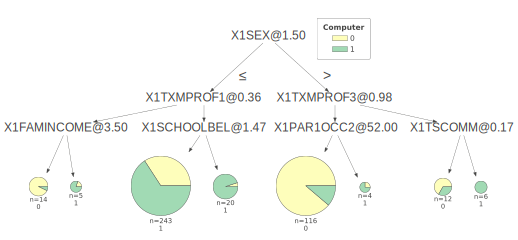

In [ ]:
v = viz.view(scale=1, fancy=False)
v

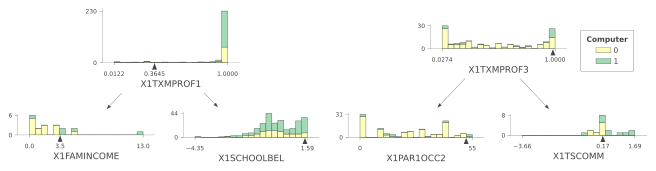

In [ ]:
v = viz.view(depth_range_to_display=(1, 2))
v

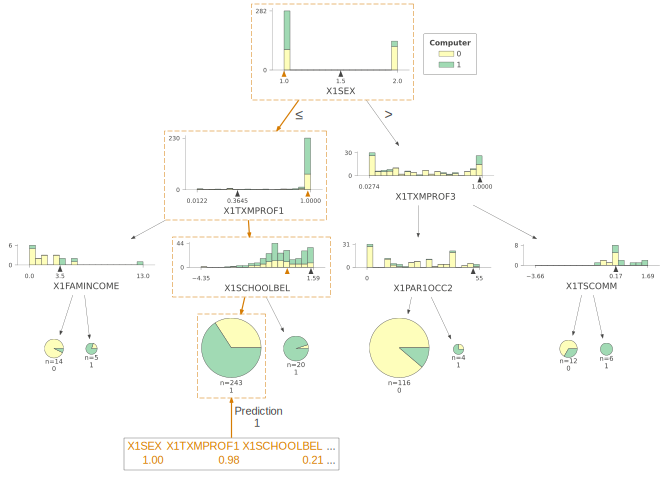

In [ ]:
v = viz.view(x=my_x.loc[my_y[my_y==1].index[0]])
v

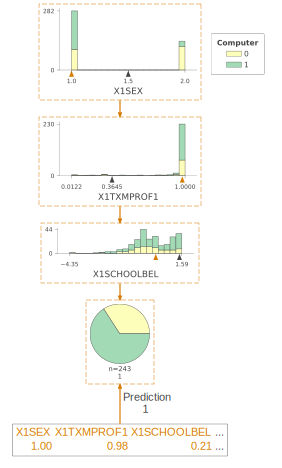

In [ ]:
v = viz.view(x=my_x.loc[my_y[my_y==1].index[0]], show_just_path=True)
v

In [ ]:
print(viz.explain_prediction_path(my_x.loc[my_y[my_y==1].index[0]]))

1.5 <= X1SEX 
5.0 <= X1STUEDEXPCT  < 8.5

